In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Batang'
plt.rcParams['font.size'] = 10
plt.rcParams["figure.figsize"] = (10,10)

## 온라인 구매 데이터

In [2]:
buy2018_1 = pd.read_csv("../활용 데이터셋/buy2018_1.csv", parse_dates=['buy2018_1.date'])
buy2018_2 = pd.read_csv("../활용 데이터셋/buy2018_2.csv", parse_dates=['buy2018_2.date'])
buy2019_1 = pd.read_csv("../활용 데이터셋/buy2019_1.csv", parse_dates=['buy2019_1.date'])
buy2019_2 = pd.read_csv("../활용 데이터셋/buy2019_2.csv", parse_dates=['buy2019_2.date'])

In [3]:
buy2018_1 = buy2018_1.drop(['Unnamed: 0'], axis=1)
buy2018_2 = buy2018_2.drop(['Unnamed: 0'], axis=1)
buy2019_1 = buy2019_1.drop(['Unnamed: 0'], axis=1)
buy2019_2 = buy2019_2.drop(['Unnamed: 0'], axis=1)

In [4]:
buy2018_1 = buy2018_1.rename(columns = {'buy2018_1.date':'date', 'buy2018_1.sex':'sex', 'buy2018_1.age':'age', 'buy2018_1.big_cat':'big_cat', 
                                        'buy2018_1.sm_cat':'sm_cat', 'buy2018_1.qty':'qty'})
buy2018_2 = buy2018_2.rename(columns = {'buy2018_2.date':'date', 'buy2018_2.sex':'sex', 'buy2018_2.age':'age', 'buy2018_2.big_cat':'big_cat', 
                                        'buy2018_2.sm_cat':'sm_cat', 'buy2018_2.qty':'qty'})
buy2019_1 = buy2019_1.rename(columns = {'buy2019_1.date':'date', 'buy2019_1.sex':'sex', 'buy2019_1.age':'age', 'buy2019_1.big_cat':'big_cat', 
                                        'buy2019_1.sm_cat':'sm_cat', 'buy2019_1.qty':'qty'})
buy2019_2 = buy2019_2.rename(columns = {'buy2019_2.date':'date', 'buy2019_2.sex':'sex', 'buy2019_2.age':'age', 'buy2019_2.big_cat':'big_cat', 
                                        'buy2019_2.sm_cat':'sm_cat', 'buy2019_2.qty':'qty'})

In [5]:
buy2018 = pd.concat([buy2018_1,buy2018_2],ignore_index=True)
buy2019 = pd.concat([buy2019_1,buy2019_2],ignore_index=True)

In [6]:
buy = pd.concat([buy2018, buy2019], ignore_index = True)

In [7]:
buy_ha = buy[buy['big_cat'] == '냉난방가전']

In [8]:
buy_ha.drop(['big_cat'], axis=1, inplace = True)

In [9]:
buy_ha

,date,sex,age,sm_cat,qty
7,2018-01-01,F,20,가열식 가습기,1
8,2018-01-01,F,40,가열식 가습기,3
9,2018-01-01,M,20,가열식 가습기,1
10,2018-01-01,M,40,가열식 가습기,2
291,2018-01-01,F,20,공기정화 용품,10
...,...,...,...,...,...
2056894,2019-12-31,M,20,히터,8
2056895,2019-12-31,M,30,히터,22
2056896,2019-12-31,M,40,히터,38
2056897,2019-12-31,M,50,히터,23


In [10]:
buy_ha= pd.DataFrame(buy_ha.groupby(['sm_cat','date'])[('qty')].sum())
buy_ha= buy_ha.reset_index()
buy_ha=buy_ha.rename(columns={'date':'일시'})

In [11]:
buy_ha

,sm_cat,일시,qty
0,가스온수기,2018-01-13,1
1,가스온수기,2018-01-17,1
2,가스온수기,2018-01-19,1
3,가스온수기,2018-01-29,2
4,가스온수기,2018-02-02,1
...,...,...,...
23427,히터,2019-12-27,233
23428,히터,2019-12-28,79
23429,히터,2019-12-29,122
23430,히터,2019-12-30,183


## 날씨 데이터

In [12]:
weather_total = pd.read_csv("../활용 데이터셋/weather_total.csv", encoding ='cp949', parse_dates=["일시"])

In [13]:
weather_total

,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),일 미세먼지 농도(㎍/㎥),불쾌지수,열지수,체감온도
0,2018-01-01,-1.076923,-5.607495,4.460158,0.000000,1.963834,51.204211,32.962963,37.559575,22.791758,-0.691516
1,2018-01-02,-0.494862,-5.861067,4.953755,0.000988,1.997822,57.358511,40.037037,37.415888,23.947132,-0.108084
2,2018-01-03,-2.437154,-6.161660,2.143676,0.005929,2.577866,47.917021,23.185185,36.317638,20.096956,-2.749178
3,2018-01-04,-2.477909,-6.495661,1.413807,0.121542,1.745257,53.737895,26.423077,35.290114,20.018996,-1.923698
4,2018-01-05,-0.992110,-4.478063,3.713241,0.212846,2.107312,56.424211,29.642857,36.873536,22.962141,-0.750031
...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,-0.089084,-3.803899,4.322612,0.032296,2.639804,54.984211,22.655172,38.316608,24.749457,-0.257046
726,2019-12-28,0.474903,-4.850980,6.946667,0.005837,1.370611,62.104211,32.862069,38.095754,25.869496,1.654966
727,2019-12-29,3.173879,-1.854813,7.169941,7.304483,1.677800,75.749474,34.172414,40.418822,31.219883,4.108163
728,2019-12-30,4.653137,-0.840119,9.321739,0.664717,2.558777,80.403158,24.296296,42.275246,34.151001,4.941824


In [14]:
buy_weather_total = pd.merge(weather_total,buy_ha,how='outer', left_on='일시', right_on='일시')

In [15]:
buy_weather_total

,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),일 미세먼지 농도(㎍/㎥),불쾌지수,열지수,체감온도,sm_cat,qty
0,2018-01-01,-1.076923,-5.607495,4.460158,0.000000,1.963834,51.204211,32.962963,37.559575,22.791758,-0.691516,가열식 가습기,7
1,2018-01-01,-1.076923,-5.607495,4.460158,0.000000,1.963834,51.204211,32.962963,37.559575,22.791758,-0.691516,공기정화 용품,120
2,2018-01-01,-1.076923,-5.607495,4.460158,0.000000,1.963834,51.204211,32.962963,37.559575,22.791758,-0.691516,공기청정기,106
3,2018-01-01,-1.076923,-5.607495,4.460158,0.000000,1.963834,51.204211,32.962963,37.559575,22.791758,-0.691516,냉풍기,1
4,2018-01-01,-1.076923,-5.607495,4.460158,0.000000,1.963834,51.204211,32.962963,37.559575,22.791758,-0.691516,돈풍기,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23427,2019-12-31,-4.385098,-7.329842,-0.116403,0.045809,3.792292,47.684211,19.758621,33.859139,16.239917,-5.830298,컨벡터,19
23428,2019-12-31,-4.385098,-7.329842,-0.116403,0.045809,3.792292,47.684211,19.758621,33.859139,16.239917,-5.830298,탁상/USB 선풍기,3
23429,2019-12-31,-4.385098,-7.329842,-0.116403,0.045809,3.792292,47.684211,19.758621,33.859139,16.239917,-5.830298,황토매트,8
23430,2019-12-31,-4.385098,-7.329842,-0.116403,0.045809,3.792292,47.684211,19.758621,33.859139,16.239917,-5.830298,휴대용 선풍기,6


## 상관관계

- http://www.6025.co.kr/bbs/board.php?bo_table=cust_in&wr_id=13

In [16]:
corr_with = lambda x: x.corrwith(x['qty'])
grouped = buy_weather_total.groupby('sm_cat')
corr_buy_weather= grouped.apply(corr_with) 

In [17]:
corr_buy_weather

,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),일 미세먼지 농도(㎍/㎥),불쾌지수,열지수,체감온도,qty
sm_cat,,,,,,,,,,,
가스온수기,0.024982,0.020680,0.025222,-0.092214,0.002546,0.091319,0.046075,0.017547,0.025006,0.024990,1.0
가열식 가습기,-0.469056,-0.455001,-0.463467,-0.181574,-0.006280,-0.192068,0.035674,-0.475302,-0.469027,-0.461221,1.0
공기정화 용품,-0.240055,-0.259629,-0.217116,-0.100599,0.050802,-0.175106,0.503922,-0.251688,-0.240064,-0.237943,1.0
공기청정기,-0.254641,-0.276400,-0.231534,-0.097400,0.068845,-0.196505,0.527301,-0.267335,-0.254654,-0.252843,1.0
난방용 열풍기,-0.174120,-0.191674,-0.161115,-0.001398,0.089973,-0.168854,-0.080609,-0.165324,-0.174143,-0.173717,1.0
냉풍기,0.458411,0.453189,0.455218,-0.019187,-0.158461,0.167025,-0.134122,0.467144,0.458376,0.455230,1.0
돈풍기,-0.302730,-0.293526,-0.300621,-0.130874,0.085921,-0.174769,-0.022518,-0.301240,-0.302727,-0.303307,1.0
라디에이터,-0.497618,-0.478046,-0.497874,-0.149309,0.092951,-0.245420,0.014807,-0.494268,-0.497598,-0.495340,1.0
멀티형 에어컨,0.209477,0.167370,0.236629,-0.092864,-0.001722,-0.125666,0.077666,0.201310,0.209399,0.206122,1.0


## 냉방
- '벽걸이 에어컨','벽걸이형 에어컨','에어컨 리모컨','탁상/USB 선풍기','휴대용 선풍기',이동형 에어컨',업소용 선풍기'
- '평균기온(°C)','최저기온(°C)','최고기온(°C)','불쾌지수','열지수','체감온도'

In [18]:
corr_buy_weather_tpr = corr_buy_weather.loc[['멀티형 에어컨', '벽걸이 에어컨', '벽걸이형 선풍기', '스탠드형 에어컨', '에어컨 리모컨','탁상/USB 선풍기', 
                                             '휴대용 선풍기', '냉풍기', '이동형 에어컨', '중대형 에어컨','천장형 에어컨', '에어커튼','업소용 선풍기']]

In [19]:
corr_buy_weather_tpr

,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),일 미세먼지 농도(㎍/㎥),불쾌지수,열지수,체감온도,qty
sm_cat,,,,,,,,,,,
멀티형 에어컨,0.209477,0.167370,0.236629,-0.092864,-0.001722,-0.125666,0.077666,0.201310,0.209399,0.206122,1.0
벽걸이 에어컨,0.475422,0.442890,0.489568,0.004724,-0.086125,0.077616,-0.036694,0.474388,0.475354,0.470694,1.0
벽걸이형 선풍기,0.590166,0.577304,0.586277,0.049355,-0.147001,0.233395,-0.144390,0.595176,0.590129,0.586343,1.0
스탠드형 에어컨,0.306188,0.255389,0.336167,-0.038881,-0.018520,-0.082179,0.092704,0.295205,0.306102,0.302341,1.0
에어컨 리모컨,0.603052,0.609025,0.587398,0.062411,-0.167867,0.289287,-0.222339,0.618940,0.603031,0.599715,1.0
탁상/USB 선풍기,0.570459,0.553867,0.569245,0.053085,-0.126792,0.218852,-0.127963,0.574298,0.570418,0.566174,1.0
휴대용 선풍기,0.588923,0.580055,0.584833,0.025039,-0.167614,0.230646,-0.165326,0.598417,0.588882,0.584775,1.0
냉풍기,0.458411,0.453189,0.455218,-0.019187,-0.158461,0.167025,-0.134122,0.467144,0.458376,0.455230,1.0
이동형 에어컨,0.535828,0.532654,0.529090,0.015989,-0.163561,0.220004,-0.162882,0.547222,0.535795,0.531659,1.0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, '평균기온(°C)'),
  Text(1.5, 0, '최저기온(°C)'),
  Text(2.5, 0, '최고기온(°C)'),
  Text(3.5, 0, '일강수량(mm)'),
  Text(4.5, 0, '평균 풍속(m/s)'),
  Text(5.5, 0, '평균 상대습도(%)'),
  Text(6.5, 0, '일 미세먼지 농도(㎍/㎥)'),
  Text(7.5, 0, '불쾌지수'),
  Text(8.5, 0, '열지수'),
  Text(9.5, 0, '체감온도'),
  Text(10.5, 0, 'qty')])

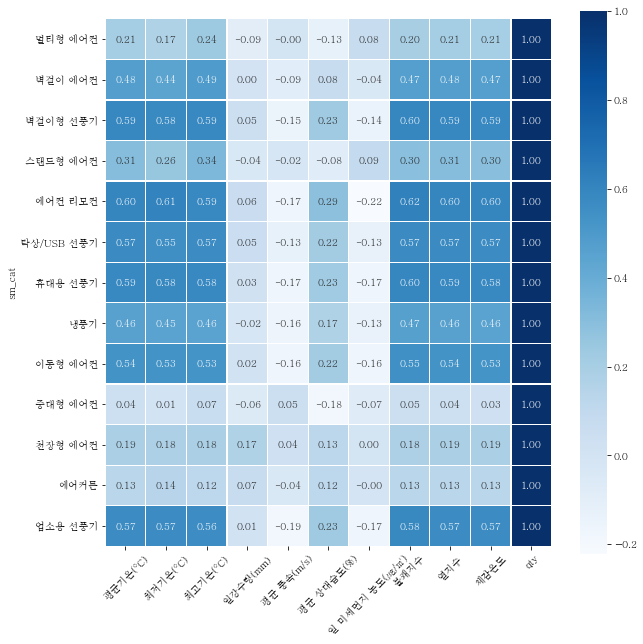

In [20]:
tpr_heatmap = sns.heatmap(corr_buy_weather_tpr, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '.2f', square = True, cmap = 'Blues',linewidth=0.2)
plt.xticks(rotation=45) 

## 난방
- ''라디에이터','온풍기','카페트매트','컨벡터','히터'
- '평균기온(°C)','최저기온(°C)','최고기온(°C)','불쾌지수','열지수','체감온도'

In [21]:
corr_buy_weather_tph = corr_buy_weather.loc[['가스온수기','난방용 열풍기', '돈풍기', '라디에이터', '보일러',
                                             '온수매트', '온열매트', '온풍기', '전기온수기', '전기장판', '카페트매트', '컨벡터','황토매트', '히터']]

In [22]:
corr_buy_weather_tph

,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),일 미세먼지 농도(㎍/㎥),불쾌지수,열지수,체감온도,qty
sm_cat,,,,,,,,,,,
가스온수기,0.024982,0.020680,0.025222,-0.092214,0.002546,0.091319,0.046075,0.017547,0.025006,0.024990,1.0
난방용 열풍기,-0.174120,-0.191674,-0.161115,-0.001398,0.089973,-0.168854,-0.080609,-0.165324,-0.174143,-0.173717,1.0
돈풍기,-0.302730,-0.293526,-0.300621,-0.130874,0.085921,-0.174769,-0.022518,-0.301240,-0.302727,-0.303307,1.0
라디에이터,-0.497618,-0.478046,-0.497874,-0.149309,0.092951,-0.245420,0.014807,-0.494268,-0.497598,-0.495340,1.0
보일러,-0.205521,-0.212954,-0.192187,-0.016439,0.043361,-0.124020,0.102966,-0.212103,-0.205520,-0.203690,1.0
온수매트,-0.224383,-0.223259,-0.205183,-0.090274,-0.091993,0.015857,-0.045728,-0.242782,-0.224334,-0.215670,1.0
온열매트,-0.138155,-0.145543,-0.121777,-0.065825,-0.004488,-0.059542,0.027951,-0.151522,-0.138146,-0.135818,1.0
온풍기,-0.505514,-0.484706,-0.504066,-0.154578,0.044627,-0.220804,0.017080,-0.505364,-0.505485,-0.501211,1.0
전기온수기,-0.371610,-0.363472,-0.367059,-0.129572,0.033096,-0.162787,0.049988,-0.379858,-0.371589,-0.368626,1.0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, '평균기온(°C)'),
  Text(1.5, 0, '최저기온(°C)'),
  Text(2.5, 0, '최고기온(°C)'),
  Text(3.5, 0, '일강수량(mm)'),
  Text(4.5, 0, '평균 풍속(m/s)'),
  Text(5.5, 0, '평균 상대습도(%)'),
  Text(6.5, 0, '일 미세먼지 농도(㎍/㎥)'),
  Text(7.5, 0, '불쾌지수'),
  Text(8.5, 0, '열지수'),
  Text(9.5, 0, '체감온도'),
  Text(10.5, 0, 'qty')])

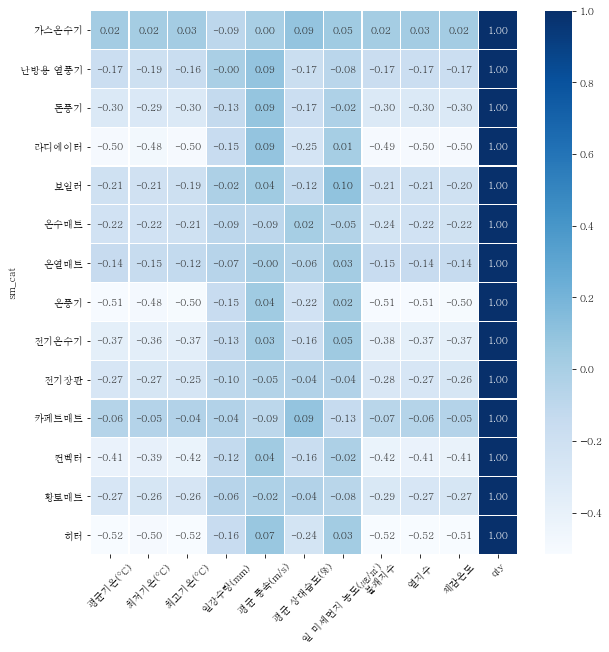

In [23]:
tph_heatmap = sns.heatmap(corr_buy_weather_tph, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '.2f', square = True, cmap = 'Blues',linewidth = 0.2)
plt.xticks(rotation=45) 

## 냉난방

In [24]:
corr_buy_weather_tp = corr_buy_weather.loc[['스탠드형 냉온풍기','벽걸이형 냉온풍기']]

In [25]:
corr_buy_weather_tp

,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),일 미세먼지 농도(㎍/㎥),불쾌지수,열지수,체감온도,qty
sm_cat,,,,,,,,,,,
스탠드형 냉온풍기,0.292350,0.260239,0.311899,-0.069173,-0.051225,-0.037800,0.018753,0.290861,0.292280,0.288451,1.0
벽걸이형 냉온풍기,0.253123,0.223562,0.270638,-0.036473,-0.066074,-0.038554,0.029258,0.250648,0.253066,0.250586,1.0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, '평균기온(°C)'),
  Text(1.5, 0, '최저기온(°C)'),
  Text(2.5, 0, '최고기온(°C)'),
  Text(3.5, 0, '일강수량(mm)'),
  Text(4.5, 0, '평균 풍속(m/s)'),
  Text(5.5, 0, '평균 상대습도(%)'),
  Text(6.5, 0, '일 미세먼지 농도(㎍/㎥)'),
  Text(7.5, 0, '불쾌지수'),
  Text(8.5, 0, '열지수'),
  Text(9.5, 0, '체감온도'),
  Text(10.5, 0, 'qty')])

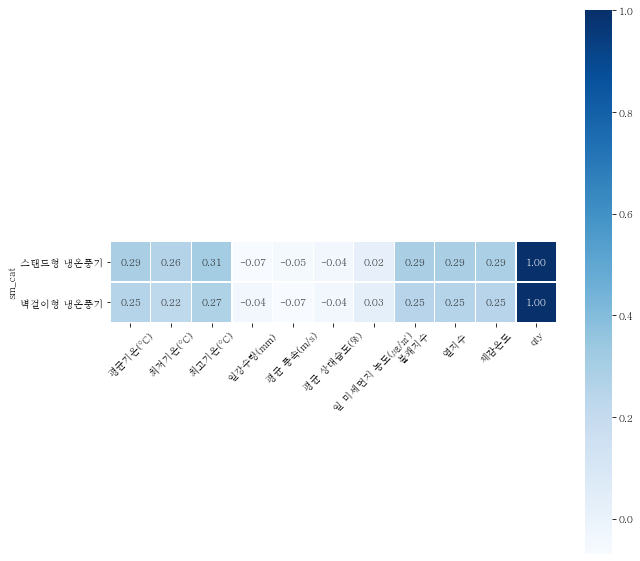

In [26]:
tp_heatmap = sns.heatmap(corr_buy_weather_tp, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '.2f', square = True, cmap = 'Blues',linewidth = 0.2)
plt.xticks(rotation=45) 

## 습도
- '제습기','초음파식 가습기','자연식 가습기','복합식 가습기','가열식 가습기','에어워셔'
- '평균기온(°C)','최저기온(°C)','최고기온(°C)','불쾌지수','열지수','체감온도'

In [27]:
corr_buy_weather_hm = corr_buy_weather.loc[['제습기','초음파식 가습기','자연식 가습기','복합식 가습기','신발건조기','의류건조기','가열식 가습기','에어워셔']]

In [28]:
corr_buy_weather_hm

,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),일 미세먼지 농도(㎍/㎥),불쾌지수,열지수,체감온도,qty
sm_cat,,,,,,,,,,,
제습기,0.423444,0.449649,0.384834,0.319574,-0.034571,0.359168,-0.169840,0.440391,0.423475,0.419510,1.0
초음파식 가습기,-0.671465,-0.652330,-0.664830,-0.204952,0.042996,-0.315048,0.146699,-0.675292,-0.671434,-0.664204,1.0
자연식 가습기,-0.430253,-0.417384,-0.427908,-0.139878,0.036252,-0.198230,0.025900,-0.434671,-0.430231,-0.425863,1.0
복합식 가습기,-0.620807,-0.606641,-0.614520,-0.189002,0.059488,-0.312840,0.153476,-0.623985,-0.620785,-0.614726,1.0
신발건조기,-0.091675,-0.083608,-0.096971,0.028393,0.001595,0.048970,0.044200,-0.101003,-0.091641,-0.089505,1.0
의류건조기,-0.278841,-0.287589,-0.271056,-0.004751,0.079401,-0.197759,0.234209,-0.282339,-0.278849,-0.277887,1.0
가열식 가습기,-0.469056,-0.455001,-0.463467,-0.181574,-0.006280,-0.192068,0.035674,-0.475302,-0.469027,-0.461221,1.0
에어워셔,-0.515333,-0.522276,-0.494228,-0.187411,0.061632,-0.269393,0.242988,-0.525239,-0.515319,-0.511007,1.0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, '평균기온(°C)'),
  Text(1.5, 0, '최저기온(°C)'),
  Text(2.5, 0, '최고기온(°C)'),
  Text(3.5, 0, '일강수량(mm)'),
  Text(4.5, 0, '평균 풍속(m/s)'),
  Text(5.5, 0, '평균 상대습도(%)'),
  Text(6.5, 0, '일 미세먼지 농도(㎍/㎥)'),
  Text(7.5, 0, '불쾌지수'),
  Text(8.5, 0, '열지수'),
  Text(9.5, 0, '체감온도'),
  Text(10.5, 0, 'qty')])

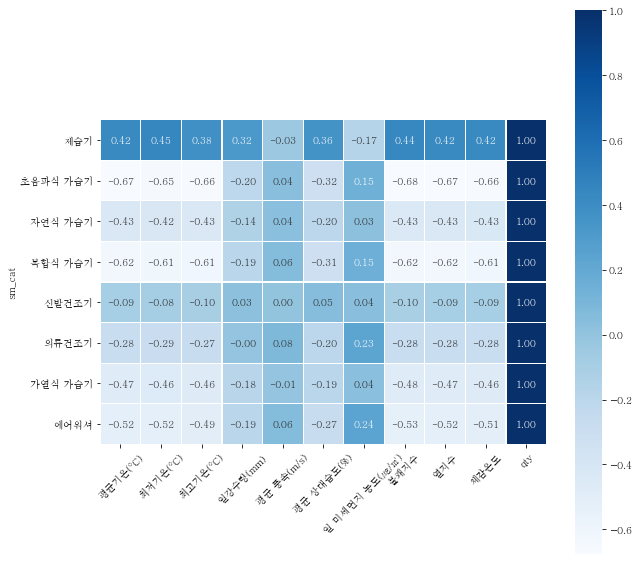

In [29]:
hm_heatmap = sns.heatmap(corr_buy_weather_hm, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '.2f', square = True, cmap = 'Blues',linewidth = 0.2)
plt.xticks(rotation=45) 

## 공기
- '공기청정기','공기정화 용품'	
- '일 미세먼지 농도(㎍/㎥)'

In [30]:
corr_buy_weather_ar = corr_buy_weather.loc[['공기청정기','공기정화 용품','산림욕기']]

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, '평균기온(°C)'),
  Text(1.5, 0, '최저기온(°C)'),
  Text(2.5, 0, '최고기온(°C)'),
  Text(3.5, 0, '일강수량(mm)'),
  Text(4.5, 0, '평균 풍속(m/s)'),
  Text(5.5, 0, '평균 상대습도(%)'),
  Text(6.5, 0, '일 미세먼지 농도(㎍/㎥)'),
  Text(7.5, 0, '불쾌지수'),
  Text(8.5, 0, '열지수'),
  Text(9.5, 0, '체감온도'),
  Text(10.5, 0, 'qty')])

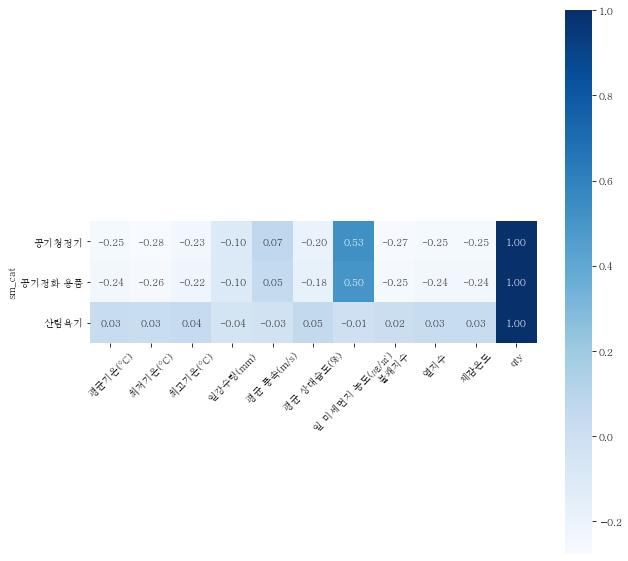

In [31]:
ar_heatmap = sns.heatmap(corr_buy_weather_ar, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '.2f', square = True, cmap = 'Blues')
plt.xticks(rotation=45) 